# 4.01.01  Cleaning numerical data

#### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np

#### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

#### 3. First look at its main features (head, shape, info).

In [79]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [80]:
data.shape

(9134, 24)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [3]:
 norm_col = []
for i in range(len(data.columns)):
    norm_col.append(data.columns[i].lower().replace(' ', '_'))

data.columns = norm_col
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


#### 5. Change effective to date column to datetime format.

In [4]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


#### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [5]:
#divide numerical and categorical values
data_num = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(include=object)

display(data_cat)
display(data_num)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [ ]:
#discrete data. finite value that can be counted/it can only have specific values
#continuous data. infinite number that can be measured/ it can take on any value in an interval

In [6]:
data_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [7]:
#CHECK HOW MANY UNIQUE VALUES ARE THERE IN EACH COLUMN

for col in data_num:
    print(col,':   ' ,len(data_num[col].value_counts()))

customer_lifetime_value :    8041
income :    5694
monthly_premium_auto :    202
months_since_last_claim :    36
months_since_policy_inception :    100
number_of_open_complaints :    6
number_of_policies :    9
total_claim_amount :    5106


In [8]:
#KNOWING THAT A DISCRETE DATA CAN ONLY HAVE SPECIFIC VALUES OR LESSER COUNTOF UNIQUE VALUES..
#I CONSIDER THAT THOSE COLUMN THAT HAS MORE THAN 200+ UNIQUE VALUES TO BE CONTINUOUS

#LOOP

continuous_df=[]
discrete_df= []


for i in data_num:

    if len(data_num[i].unique()) > 200:
        continuous_df.append(i)
              
    else:
        discrete_df.append(i)

display(continuous_df)
display(discrete_df)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [9]:
#USE THE CODE TO CREATE A GENERAL FUNCTION 


def cont_disc (df):
    continuous_df=[]
    discrete_df= []
    
    for col in df.columns:
        if len(df[col].unique()) > 200:
            continuous_df.append(col)
              #  if len(df[col].unique()) > (df.shape[0] * 0.01): 
           # it will be discrete if it occupies the 1% of the dataframe shape
        else:
            discrete_df.append(col)
    return continuous_df, discrete_df

In [10]:
cont_var, disc_var = cont_disc(data_num)
print('continuous = ', cont_var)
print('discrete =', disc_var)

continuous =  ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']
discrete = ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


In [11]:
DiscreteValues=data[discrete_df]
DiscreteValues

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [12]:
ContinuousValues=data[continuous_df]
ContinuousValues

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


#### 7. Plot a correlation matrix, comment what you see.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#CORRECTION. PLOTTING MULTIPLE FEATURES.
def plot_cat(Dataframe):
    for column in Dataframe.columns:
        sns.countplot (x = Dataframe[column])
        plt.show()
    return None

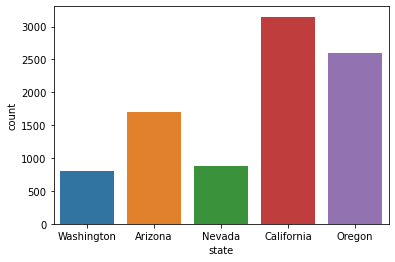

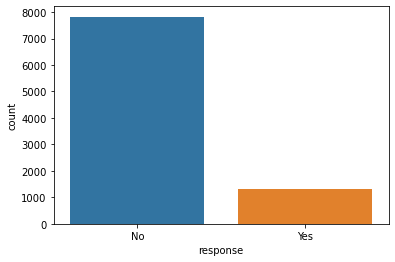

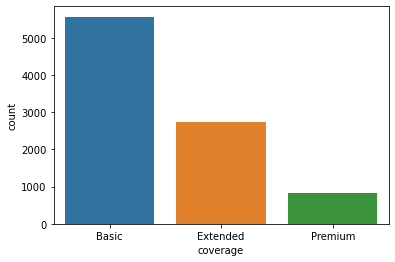

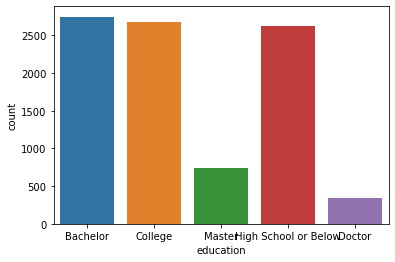

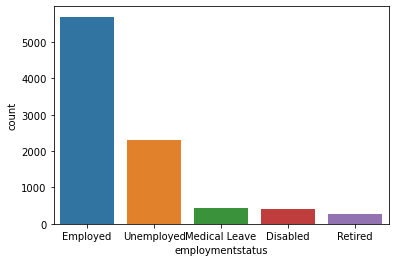

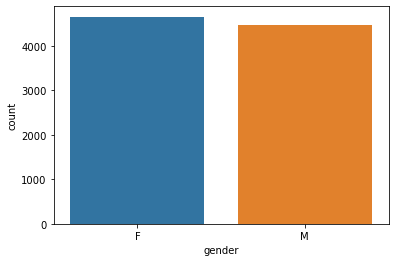

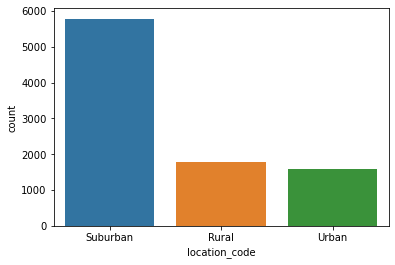

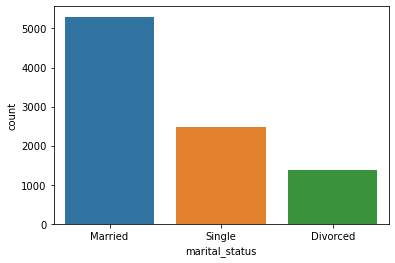

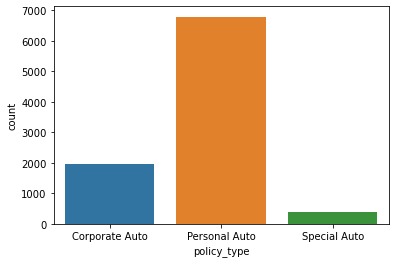

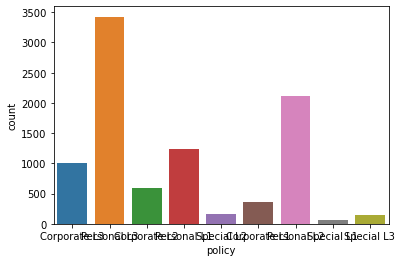

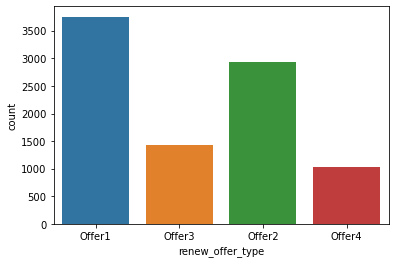

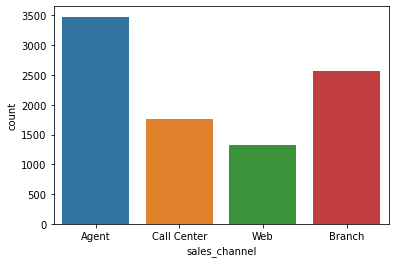

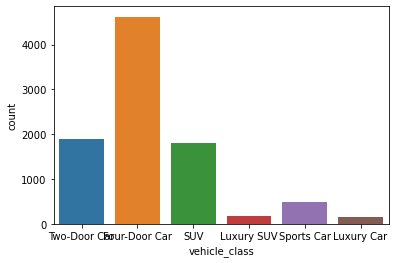

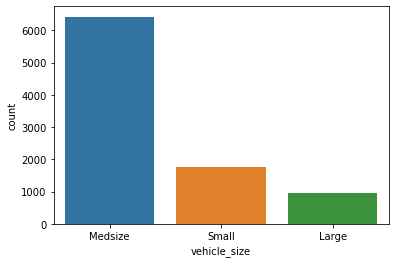

In [17]:
plot_cat(data_cat)

In [18]:
correlations = data.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


#### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

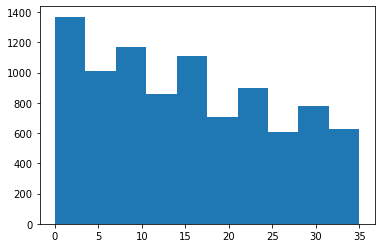

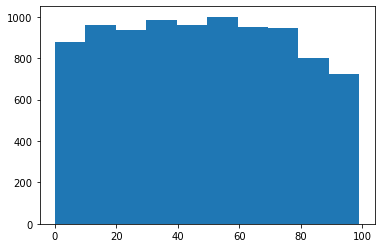

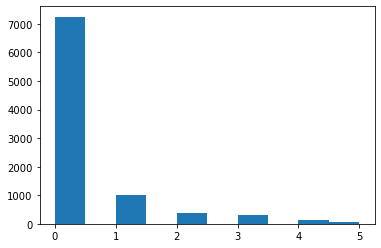

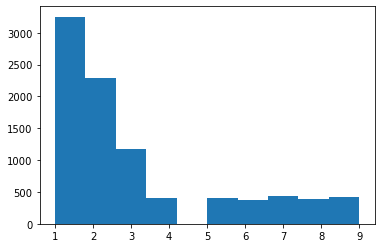

In [20]:
for x in DiscreteValues.columns:
    plt.hist(DiscreteValues[x], bins=10)
    plt.show()
    
# for column in  DiscreteValues.columns:
#     sns.histplot( DiscreteValues.columns, bins=10)
#     plt.show()

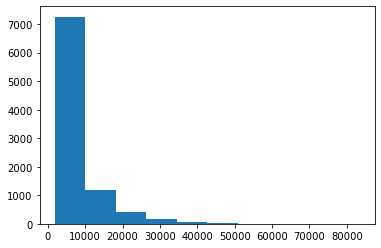

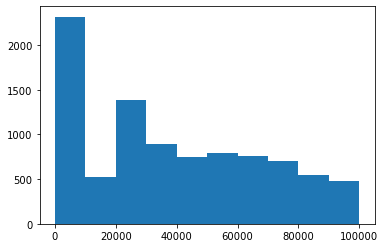

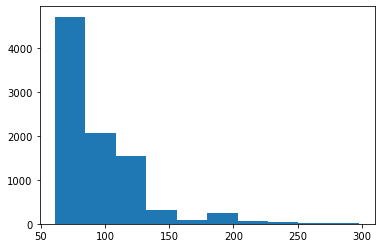

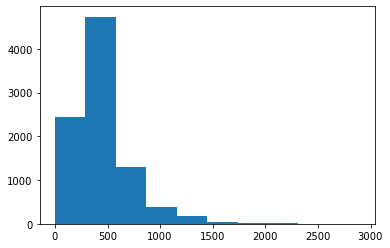

In [21]:
for x in ContinuousValues.columns:
    plt.hist(ContinuousValues[x], bins=10)
    plt.show()

# for column in ContinuousValues.columns:
#     sns.histplot(ContinuousValues.columns)
#     plt.show()

# for column in ContinuousValues.columns:
#     sns.distplot(ContinuousValues.columns)
#     plt.show()

# column in ContinuousValues.columns:
#     sns.boxplot(ContinuousValues.columns)
#     plt.show()

#### 9. Comment what you can see in the plots.

##### ------ The range of the continuous data is much more larger than the range of discrete data.

#### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


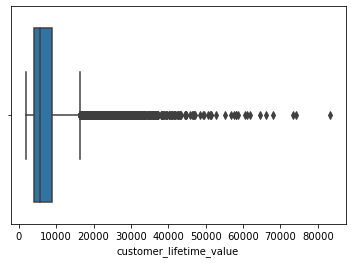

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


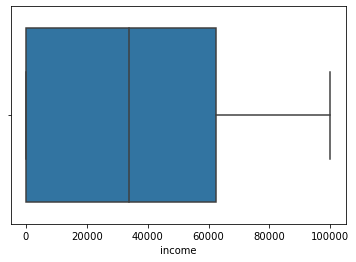

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


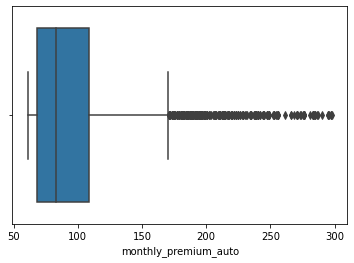

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


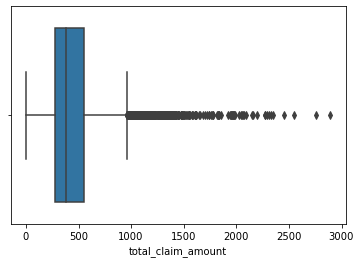

In [22]:
for x in ContinuousValues:
    sns.boxplot(ContinuousValues[x])
    plt.show()

#### 11. Did you find outliers? Comment what you will do with them.

##### customer_lifetime_value: drop | income: 0 with mean | monthly_premium_auto & total_claim_amount work on it because it has massive outliers

#### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [23]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

# 4.01.02 Cleaning categorical data

#### 1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

In [24]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.shape

(9134, 24)

#### 2. Find all of the categorical data. Save it in a categorical_df variable

In [25]:
data_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


#### 3. Check for NaN values

In [26]:
data_cat.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

#### 4. Check all unique values of columns

In [27]:
data_cat.nunique()
#customer has all unique values

state               5
response            2
coverage            3
education           5
employmentstatus    5
gender              2
location_code       3
marital_status      3
policy_type         3
policy              9
renew_offer_type    4
sales_channel       4
vehicle_class       6
vehicle_size        3
dtype: int64

In [16]:
data_cat= data_cat.drop(['customer'], axis = 1)
#because it has a distinct value for every row

#Policy and Renew Offer Type has alpha-numeric value

#### 5. Check dtypes. Do they all make sense as categorical data?

In [28]:
data_cat.dtypes

#yes, because they all are objects.

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

#### 6. Does any column contain alpha and numeric data? Decide how to clean it

In [29]:
data_cat['policy'].value_counts()
#Policy gives the same information as Policy type. I can drop either one of them.

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [ ]:
data_cat['renew_offer_type'].value_counts()
#I can leave it as is.

#### 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions

#####  Apart from dropping 'Customer' and dropping either 'Policy' or 'Policy Type', I could also consider cleaning the categorical data by normalizing it.

#### 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [30]:
display(data_cat['policy'].value_counts())
display(data_cat['policy_type'].value_counts())

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

##### Policy Type states just the type of different policies, while the policy  states the subtypes too. To clean the data, we could consider dropping the 'Policy' because we would only need the type of the policy and wouldn't affect our data if we drop its subtypes.

In [31]:
data_cat.drop(['policy'], axis= 1)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large


#### 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [32]:
display(data_cat['state'].value_counts())
display(data_cat['response'].value_counts())
display(data_cat['coverage'].value_counts())
display(data_cat['education'].value_counts())
display(data_cat['employmentstatus'].value_counts())
display(data_cat['gender'].value_counts())
display(data_cat['location_code'].value_counts())
display(data_cat['marital_status'].value_counts())
display(data_cat['policy_type'].value_counts())
display(data_cat['renew_offer_type'].value_counts())
display(data_cat['sales_channel'].value_counts())
display(data_cat['vehicle_class'].value_counts())
display(data_cat['vehicle_size'].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

##### education: consider combining masters and dr | employment_status: we can combine Medical leave, disabled and retired into 'other' | vehicle_class: combine sports car, luxury car and luxury suv into 'Luxury Car' | ENCODE THE REST OF THE CATEGORICAL VALUES

In [33]:
data_cat['education'] = np.where(data_cat['education'].isin(['Master','Doctor']) , 'Post-grad', data_cat['education'])
data_cat['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Post-grad               1083
Name: education, dtype: int64

In [34]:
data_cat['employmentstatus'] = np.where(data_cat['employmentstatus'].isin(['Medical Leave','Disabled','Retired']) , 'Others', data_cat['employmentstatus'])
data_cat['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Others        1119
Name: employmentstatus, dtype: int64

In [35]:
data_cat['vehicle_class'] = np.where(data_cat['vehicle_class'].isin(['Sports Car','Luxury SUV','Luxury Car']) , 'Luxury Car', data_cat['vehicle_class'])
data_cat['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury Car        831
Name: vehicle_class, dtype: int64

In [ ]:
#Encode the categorical variables

data_cat = pd.get_dummies(data_cat, drop_first=True)
data_cat

# FEATURE EXTRACTION

#### 1. Open the categoricals variable we created before.

categoricals = data.select_dtypes(np.object)

categoricals.head()


In [36]:
data_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### 2. Plot all the categorical variables with the proper plot. What can you see?

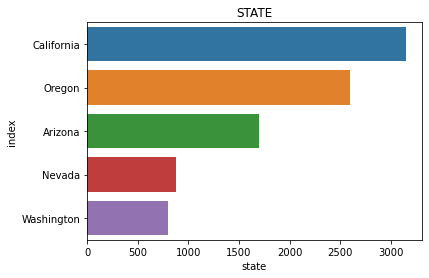

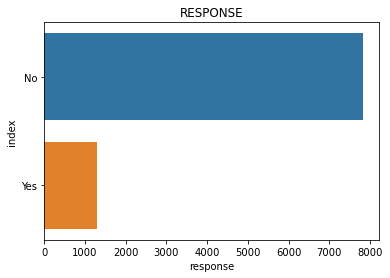

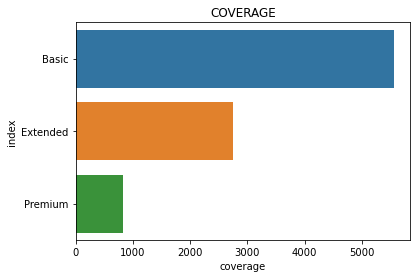

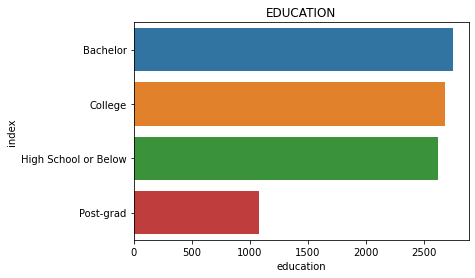

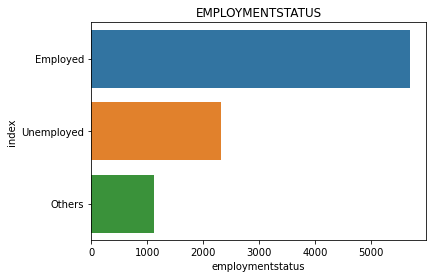

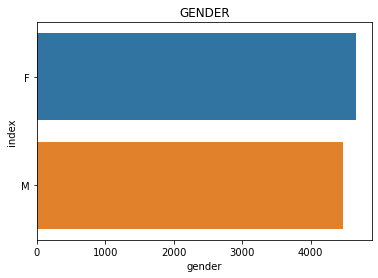

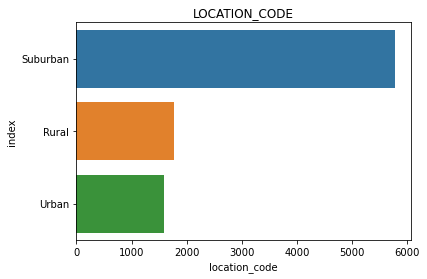

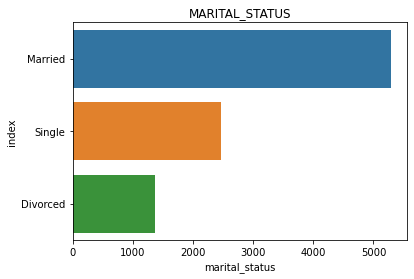

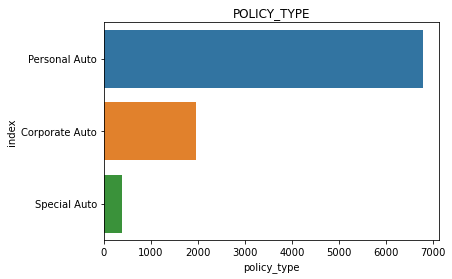

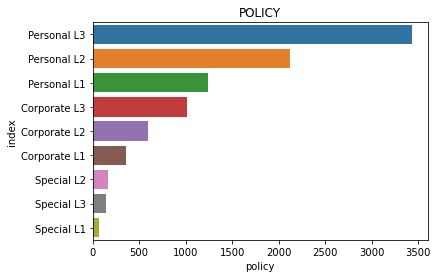

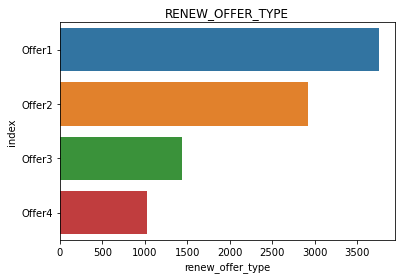

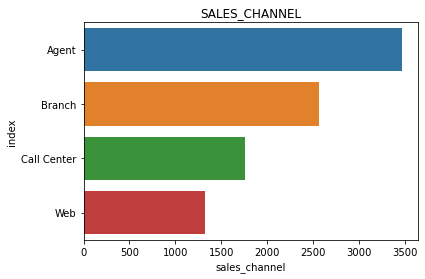

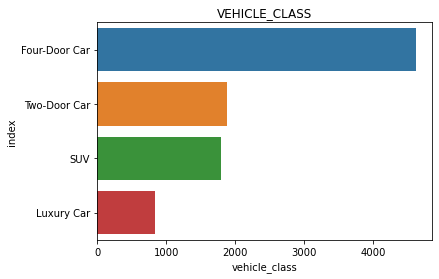

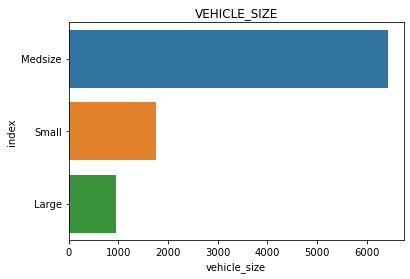

<Figure size 432x288 with 0 Axes>

In [37]:
# def plot_cat(Dataframe):
#     for column in Dataframe.columns:
#         sns.countplot (x = Dataframe[column])
#         plt.show()
#     return None

# plot_cat(data_cat)

def cat_plotter(df):
    cols_cat = list(df.select_dtypes(include=['object']).columns)
    for col in cols_cat:
        my_data = df[col].value_counts().reset_index()
        ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
        plt.figure()
    
cat_plotter(data_cat)

##### There are columns in the plots of response, coverage, employment_status, location_code, marital_status, policy_type, vehicle_class,vehicle_size where one feature is way much bigger than any other features.

#### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [38]:
list_cat = list(data_cat.columns)
for col in list_cat:
    display(data_cat[col].value_counts())
    print()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Post-grad               1083
Name: education, dtype: int64

Employed      5698
Unemployed    2317
Others        1119
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury Car        831
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [39]:
data_cat= data_cat.drop(['policy'], axis = 1)


In [ ]:
#I dropped the policy because it didn't seem to reflect on the cleaning that I did in the previous lab for the reason that I haven't put it into a function.

#### 4. Plot time variable. Can you extract something from it?

In [41]:
chart = sns.histplot(data['effective_to_date'])
plt.xticks(rotation=80)
plt.show()


#I think we could say that the renewal of insurance is every 15th of the month and some people don't renew their insurance after that.

KeyError: 'effective_to_date'

# Comparing regression models

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#imported it again just to be sure

In [65]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [48]:
def standardize_cols (df):
    cols = []
    for column in df.columns:
        cols.append(column.lower().replace(' ','_')) #fill in the list with all column names in lowercase
    df.columns = cols #replace the dataframe columns with the columns stored in the list
    
    return df

#turn it into a function and not just a loop :)

In [66]:
customer_df = standardize_cols(data)
display(customer_df.head(5))

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [ ]:
from sklearn.model_selection import train_test_split

#### 2. We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [67]:
customer_df = customer_df.drop(['customer'], axis =1)
customer_df = customer_df.drop(['policy'], axis =1)
customer_df['education'] = np.where(customer_df['education'].isin(['Master','Doctor']) , 'Post-grad', customer_df['education'])
customer_df['employmentstatus'] = np.where(customer_df['employmentstatus'].isin(['Medical Leave','Disabled','Retired']) , 'Others', customer_df['employmentstatus'])
customer_df['vehicle_class'] = np.where(customer_df['vehicle_class'].isin(['Sports Car','Luxury SUV','Luxury Car']) , 'Luxury Car', customer_df['vehicle_class'])

In [68]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [69]:
customer_df['effective_to_date'] =  pd.to_datetime(customer_df['effective_to_date'])

(9134,)

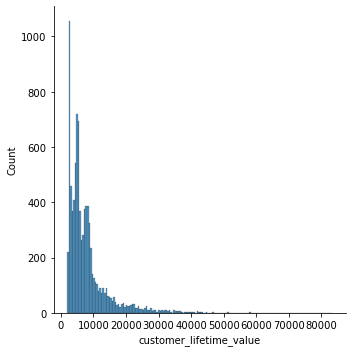

In [70]:
iqr = np.percentile(customer_df['customer_lifetime_value'],75) - np.percentile(customer_df['customer_lifetime_value'],25)
upper_limit = np.percentile(customer_df['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(customer_df['customer_lifetime_value'],25) - 1.5*iqr
cust_num_cont = customer_df[(customer_df['customer_lifetime_value']>lower_limit) & (customer_df['customer_lifetime_value']<upper_limit)]
sns.displot(customer_df['customer_lifetime_value'])
customer_df['customer_lifetime_value'].shape

(9134,)

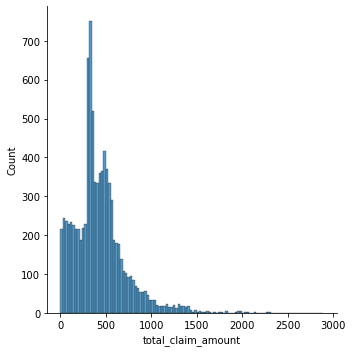

In [71]:
iqr = np.percentile(customer_df['total_claim_amount'],75) - np.percentile(customer_df['total_claim_amount'],25)
upper_limit = np.percentile(customer_df['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(customer_df['total_claim_amount'],25) - 1.5*iqr
cust_num_cont = customer_df[(customer_df['total_claim_amount']>lower_limit) & (customer_df['total_claim_amount']<upper_limit)]
sns.displot(customer_df['total_claim_amount'])
customer_df['total_claim_amount'].shape

(9134,)

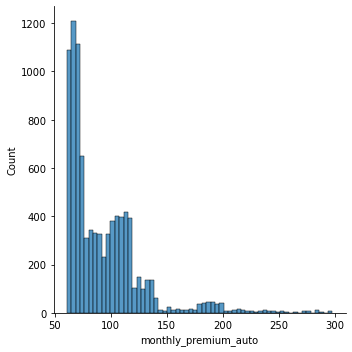

In [72]:
iqr = np.percentile(customer_df['monthly_premium_auto'],75) - np.percentile(customer_df['monthly_premium_auto'],25)
upper_limit = np.percentile(customer_df['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(customer_df['monthly_premium_auto'],25) - 1.5*iqr
cust_num_cont = customer_df[(customer_df['monthly_premium_auto']>lower_limit) & (customer_df['monthly_premium_auto']<upper_limit)]
sns.displot(customer_df['monthly_premium_auto'])
customer_df['monthly_premium_auto'].shape

#### 3. Create a copy of the dataframe for the data wrangling.

In [125]:
df=customer_df.copy()
df.head(60)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,...,14,94,0,2,Personal Auto,Offer2,Web,159.383042,Two-Door Car,Medsize
6,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,Suburban,...,0,13,0,9,Corporate Auto,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,Arizona,7216.100311,No,Premium,Post-grad,2011-01-18,Unemployed,M,0,Urban,...,0,68,0,4,Corporate Auto,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Others,M,14072,Suburban,...,13,3,0,2,Corporate Auto,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,Urban,...,17,7,0,8,Special Auto,Offer2,Branch,425.527834,Four-Door Car,Medsize


#### 4. Normalize the continuous variables. You can use any one method you want.

In [ ]:
#I GOT CONFUSED ABOUT MY DATA. I HAD TO RESEPARATE THEM. 

In [104]:
#ALTERNATIVE WAY TO DO IT
#SEPARATING CATEGORICAL, NUMERICAL DISCRETE AND CONTINUOUS DISCRETE IN 1 FUNCTION

def data_type(x):
    cat_lst=[]
    dis_lst=[]
    con_lst=[]
    
    for col in list(x.columns):
        if x[col].dtypes == 'object':
            cat_lst.append(col)
        elif len(df[col].unique()) > 100:
            con_lst.append(col)
        else:
            dis_lst.append(col)
    
    return cat_lst,con_lst,dis_lst 

In [106]:
data=data_type(df)
continuous=df[data[1]]
discrete=df[data[2]]
categorical=df[data[0]]

In [107]:
discrete.head()

,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2011-02-24,32,5,0,1
1,2011-01-31,13,42,0,8
2,2011-02-19,18,38,0,2
3,2011-01-20,18,65,0,7
4,2011-02-03,12,44,0,1


In [108]:
continuous.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


In [110]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
#NORMALIZING CONTINUOUS VARIABLES

In [114]:
from sklearn import preprocessing
con_df = preprocessing.normalize(continuous, axis=0)
names = continuous.columns
con_scaled = pd.DataFrame(con_df, columns=names)
con_scaled.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,0.002741,0.012170,0.007266,0.007709
1,0.006923,0.000000,0.009898,0.022666
2,0.012783,0.010546,0.011372,0.011348
3,0.007584,0.000000,0.011162,0.010615
4,0.002791,0.009480,0.007687,0.002767


#### 5. Encode the categorical variables (See the hint below for encoding categorical data!!!)

### Hint for Categorical Variables
You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

-One hot	state
-Ordinal	coverage
-Ordinal	employmentstatus
-Ordinal	location code
-One hot	marital status
-One hot	policy type
-One hot	policy
-One hot	renew offercustomer_df
-One hot	sales channel
-One hot	vehicle class
-Ordinal	vehicle size

.
Dummy code
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.

#### ORDINAL CATEGORICAL

In [126]:
df["coverage"] = df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [128]:
df["employmentstatus"] = df["employmentstatus"].map({"Unemployed" : 0, "Retired" : 1, "Others" : 2})

In [129]:
df['location_code']=df["location_code"].map({'Rural':0,"Suburban" : 1, "Urban" : 2})

In [130]:
df['vehicle_size']=df["vehicle_size"].map({"Small" : 0,"Medsize" : 1, 'Large': 2})

#### GET DUMMIES CATEGORICAL

In [145]:
categorical = pd.get_dummies(df.select_dtypes('object'), columns=list(df.select_dtypes('object').columns),drop_first=True)
categorical.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_High School or Below,education_Post-grad,gender_M,marital_status_Married,...,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### 6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [148]:
customer_df['year'] = pd.DatetimeIndex(customer_df['effective_to_date']).year
customer_df['year'].unique()

array([2011], dtype=int64)

In [149]:
#there is only 1 year
customer_df.drop(columns='year',inplace=True)

In [150]:
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month
customer_df['month'].unique()

array([2, 1], dtype=int64)

In [151]:
customer_df['day'] = pd.DatetimeIndex(customer_df['effective_to_date']).day
customer_df['day'].unique()

array([24, 31, 19, 20,  3, 25, 18, 26, 17, 21,  6, 10,  5, 27, 14, 29, 28,
       12,  2,  7, 22, 13, 15,  8, 11, 23, 16,  9,  4,  1, 30],
      dtype=int64)

In [ ]:
#GROUP IT FROM WEEKS 1 TO 4

customer_df['day'] = np.where(customer_df['day'] < 8 ,1,customer_df['day'])
customer_df['day'] = np.where(((customer_df['day'] < 15) & (customer_df['day'] > 8))  ,2,customer_df['day'])
customer_df['day'] = np.where(((customer_df['day'] < 22) & (customer_df['day'] >= 15)) ,3,customer_df['day'])
customer_df['day'] = np.where(((customer_df['day'] <= 31) & (customer_df['day'] >= 22)) ,4,customer_df['day'])

In [153]:
#CHANGE THE NAME OF THE COLUMN
customer_df.rename(columns={'day':'week'},inplace=True)

#DROP EFFECTIVE_TO_DATE
customer_df.drop(columns='effective_to_date',inplace=True)

#### 7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [142]:
xdata=df.select_dtypes('number').drop(columns='total_claim_amount',inplace=True)
X=pd.concat([xdata,categorical],axis=1)

y=customer_df['total_claim_amount']

In [143]:
X.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_High School or Below,education_Post-grad,gender_M,marital_status_Married,...,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total_claim_amount, dtype: float64

#### 8. Try a simple linear regression with all the data to see whether we are getting good results.

In [155]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(x)
x_standarized = transformer.transform(x)
x_standarized = pd.DataFrame(x_standarized)

X=x_standarized

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [162]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [163]:
# list of models
models = [LinearRegression(), KNeighborsRegressor()]

#### 9. Define a function that takes a list of models and train (and tests) them

In [174]:
def m_func(mod):
    
    mod.fit(X_train,y_train)
    m_pred= mod.predict(X_test)
    MAE = mean_absolute_error(y_test,m_pred)
    MSE = mean_squared_error(y_test,m_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,m_pred)

    
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))
    


#### 10. Use the function to check LinearRegressor and KNeighborsRegressor.

In [175]:
linear=m_func(models[0])

The mean absolute error of the model in the test set is: 172.32
The mean squared error of the model in the test set is: 55285.60
The root mean squared error of the model in the test set is: 235.13
The R2 of the model in the test set is: 0.31


In [176]:
knn=m_func(models[1])

The mean absolute error of the model in the test set is: 183.84
The mean squared error of the model in the test set is: 62287.49
The root mean squared error of the model in the test set is: 249.57
The R2 of the model in the test set is: 0.22


# Random variable distributions

#### 1. Get the numerical variables from our dataset.

In [188]:
#For this particular lab I will drop month & week
numerical_df = customer_df.select_dtypes(include=np.number)
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,week
0,2763.519279,56274,69,32,5,0,1,384.811147,2,24
1,6979.535903,0,94,13,42,0,8,1131.464935,1,31
2,12887.431650,48767,108,18,38,0,2,566.472247,2,19
3,7645.861827,0,106,18,65,0,7,529.881344,1,20
4,2813.692575,43836,73,12,44,0,1,138.130879,2,3
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,2,10
9130,3096.511217,21604,79,14,28,0,1,379.200000,2,12
9131,8163.890428,0,85,9,37,3,2,790.784983,2,6
9132,7524.442436,21941,96,34,3,0,3,691.200000,2,3


In [190]:
numerical_df = numerical_df.drop(['month'], axis = 1)
numerical_df = numerical_df.drop(['week'], axis = 1)

#### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


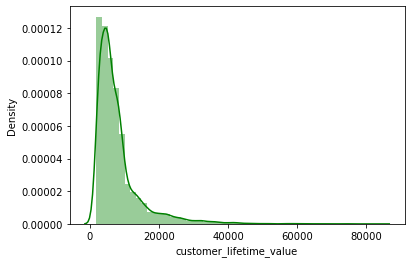

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


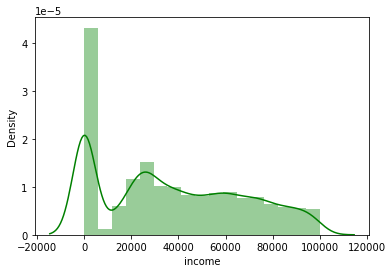

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


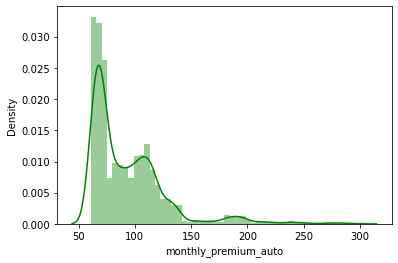

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


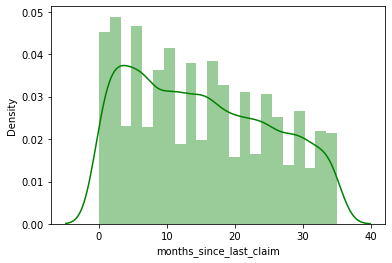

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


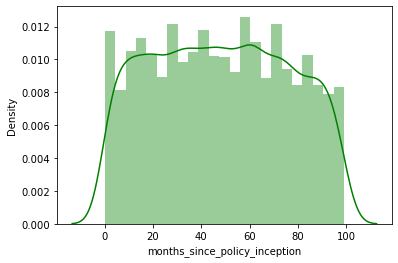

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


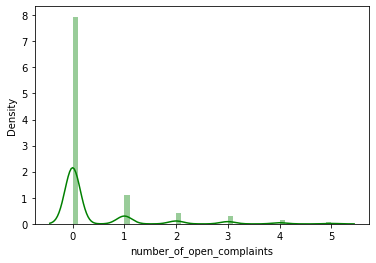

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


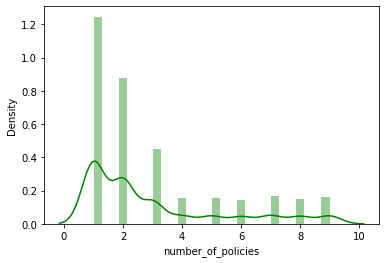

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


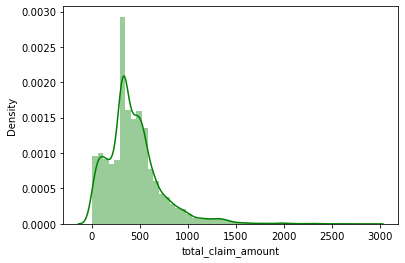

In [191]:
for column in numerical_df:
    fig, ax = plt.subplots()
    sns.distplot(numerical_df[column],  color="g", ax=ax)
    plt.show()

In [ ]:
#ALL SEEMS TO HAVE A EXPONENTIAL DISTRIBUTION, WITH MONTH SINCE POLICY INCEPTION BEING DIFFERENT.

#### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

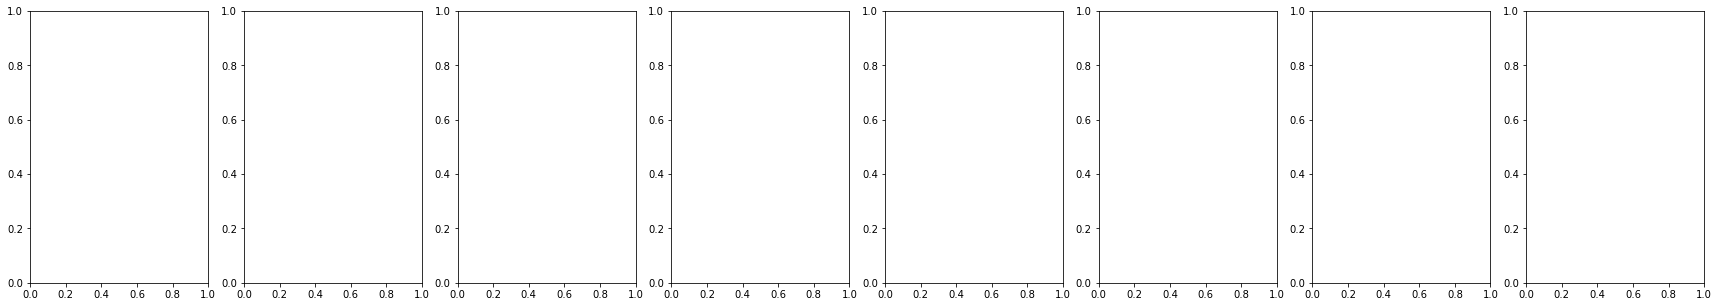

In [206]:
def hist_maker(df):
    cols = list(df.columns)
    x = len(cols)
    fig, ax = plt.subplots(1,x, figsize=(30,5))
    
    
def log_transf(df):
    df2 = df.copy()
    
    for col in df2.columns:
        values = []
        
        for x in df2[col]:
            if (np.isfinite(x)) and (x != 0):
                x = np.log(x)
                values.append(x)
            else:
                x = x
                values.append(x)
                
        df2[col] = values
    
    return df2

hist_maker(log_transf(numerical_df))
  # '''Returns histplots in a single fig for each column of a given DataFrame
    
    
    
    ####WHYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY